In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/twitter_disaster.csv')

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
missing_values = df.isnull().sum()
print('Missing values:\n', missing_values)

Missing values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [ ]:
df['keyword'].fillna('Unknown', inplace=True)
df['location'].fillna('Unknown', inplace=True)


<ipython-input-6-268aa7d11a7e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna('Unknown', inplace=True)
<ipython-input-6-268aa7d11a7e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,Unknown,Unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Unknown,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Unknown,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Unknown,Just got sent this photo from Ruby #Alaska as ...,1


<ipython-input-8-b3d499e69c8c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


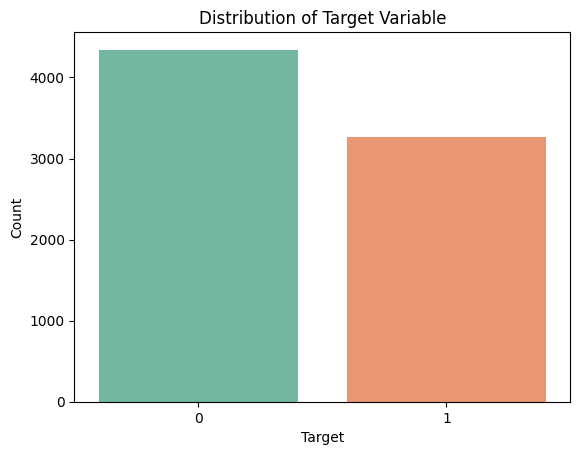

In [ ]:
# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=df, palette='Set2')
plt.xlabel('Target (0 = Non-Disaster, 1 = Disaster)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()


**Analyze Frequently Occurring**

In [ ]:
from wordcloud import WordCloud
# Filter disaster-related tweets
disaster_tweets = df[df['target'] == 1]['text']
# Combine all disaster-related tweets into a single string
disaster_text = ' '.join(disaster_tweets)
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)


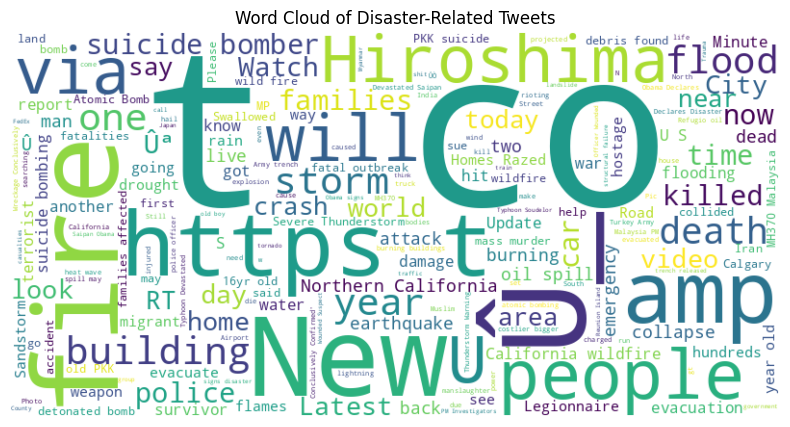

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster-Related Tweets')
plt.show()

In [ ]:
import re

# Function to clean text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(clean_text)

**Tokenize Text**

In [ ]:
# Tokenization splits text into individual words.
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Tokenize the 'text' column
df['tokens'] = df['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
#  Encode Labels
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'target' column
df['encoded_target'] = label_encoder.fit_transform(df['target'])

**Split the Data into Training and Testing Subsets**

In [ ]:
# Use train_test_split to divide the data.
from sklearn.model_selection import train_test_split

# Features and target
X = df['text']  # Text data
y = df['target']  # Labels


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Combined Code for Data Preparation**

In [ ]:
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Function to clean text data
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Clean text data
df['text'] = df['text'].apply(clean_text)

# Tokenize text data
import nltk
nltk.download('punkt')
df['tokens'] = df['text'].apply(word_tokenize)

# Split data into training and testing subsets
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print data split sizes
print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training set: 6090 samples
Testing set: 1523 samples


**Word Frequencies and TF-IDF Scores Word Frequencies count occurrences of each word. TF-IDF (Term Frequency-Inverse Document Frequency) measures the importance of words in the text.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
count_vectorizer = CountVectorizer(max_features=5000)  # Use top 5000 features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit-transform on training data, transform on test data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Use sentiment analysis libraries like TextBlob or VADER to extract sentiment polarity.
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Add sentiment scores as a feature
df['sentiment'] = df['text'].apply(get_sentiment)

**Pre-Trained Embeddings (Word2Vec/GloVe)**

In [ ]:
# Use pre-trained embeddings for semantic meaning. Here's an example using Gensim for Word2Vec.
!pip install gensim # Install the gensim library
import gensim # Import the gensim library
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec embeddings
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz',
    binary=True,
    encoding='latin-1'  # or 'ISO-8859-1' if 'latin-1' doesn't work
)
# Function to get average Word2Vec embeddings
def get_average_word2vec(tokens, model, vector_size=300):
    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * vector_size

# Apply function to get embeddings
df['word2vec'] = df['tokens'].apply(lambda x: get_average_word2vec(x, word2vec_model)) # Change word2vec to word2vec_model

**Additional Features**

In [ ]:
# Add tweet length as a feature
df['tweet_length'] = df['text'].apply(len)

# Add hashtag count as a feature
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))

# Add user mention count as a feature
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))

**Combined Code for Feature Engineering**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from gensim.models import KeyedVectors

# Initialize vectorizers
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit-transform on training data, transform on test data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Add sentiment scores
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Load pre-trained Word2Vec embeddings
word2vec_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

# Get average Word2Vec embeddings
# Change word2vec to word2vec_model in the function call
df['word2vec'] = df['tokens'].apply(lambda x: get_average_word2vec(x, word2vec_model))

# Add additional features
df['tweet_length'] = df['text'].apply(len)
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))

** Model Training and evaluation**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test_tfidf)

# Evaluate performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test_tfidf)

# Evaluate performance
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.71      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

Accuracy: 0.8089297439264609
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.81      0.64      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.78      1523

Accuracy: 0.7839789888378201


** Hyperparameter Tuning**


Use GridSearchCV for finding the best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Grid search - remove n_jobs=-1 to avoid multiprocessing
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1') # Removed n_jobs=-1
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best_rf = best_rf.predict(X_test_tfidf)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       874
           1       0.81      0.66      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



 **Hyperparameter Tuning**

 Use GridSearchCV for finding the best parameters.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10,],
    'min_samples_split': [2, 5, 10],
}

# Grid search - use 'f1' directly as the scoring parameter
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and model

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best_rf = best_rf.predict(X_test_tfidf)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       874
           1       0.81      0.66      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



**Addressing Recall for Class 1**

Use Class Weighting (class_weight='balanced')

In [ ]:
# Train Random Forest with class weighting
rf_balanced = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=10,
    class_weight='balanced', random_state=42
)
rf_balanced.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_balanced = rf_balanced.predict(X_test_tfidf)

from sklearn.metrics import classification_report
print("Random Forest with Class Weighting Performance:")
print(classification_report(y_test, y_pred_balanced))

Random Forest with Class Weighting Performance:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       874
           1       0.80      0.67      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



**Oversample Minority Class with SMOTE**



In [ ]:
!pip install scikit-learn==1.3.0 imbalanced-learn

In [ ]:
#Oversample Minority Class with SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=10, random_state=42
)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_smote = rf_smote.predict(X_test_tfidf)
print("Random Forest with SMOTE Performance:")
print(classification_report(y_test, y_pred_smote))

Random Forest with SMOTE Performance:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       874
           1       0.80      0.65      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



**Undersample Majority Class**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_tfidf, y_train)

# Train Random Forest on undersampled data
rf_under = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=10, random_state=42
)
rf_under.fit(X_train_under, y_train_under)

# Predict and evaluate
y_pred_under = rf_under.predict(X_test_tfidf)
print("Random Forest with Undersampling Performance:")
print(classification_report(y_test, y_pred_under))

Random Forest with Undersampling Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       874
           1       0.77      0.70      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



**Explore Other Models: XGBoost and LightGBM**


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_tfidf)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       874
           1       0.79      0.60      0.68       649

    accuracy                           0.76      1523
   macro avg       0.77      0.74      0.75      1523
weighted avg       0.77      0.76      0.76      1523



In [ ]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lgbm.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lgbm = lgbm.predict(X_test_tfidf)
print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 2622, number of negative: 3468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14027
[LightGBM] [Info] Number of data points in the train set: 6090, number of used features: 683
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430542 -> initscore=-0.279641
[LightGBM] [Info] Start training from score -0.279641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

**Fine-Tune Further**

**Assess Model Performance**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Evaluate Random Forest Model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_tfidf)[:, 1])
print("ROC-AUC Score:", roc_auc)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.81      0.64      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.78      1523

ROC-AUC Score: 0.8390667917197024


**Visualize Confusion Matrix**

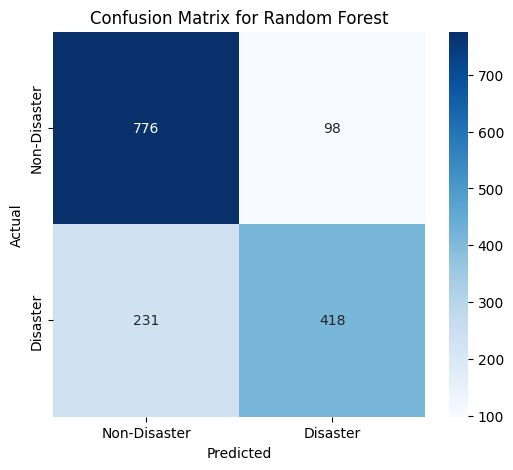

In [ ]:
# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

**Visualize ROC and Precision-Recall Curves**

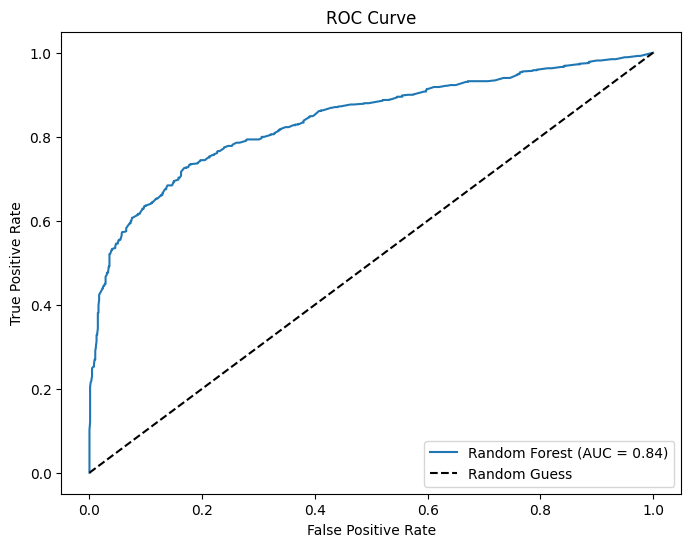

In [ ]:
# ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(rf, X_test_tfidf, y_test, "Random Forest")

**Compare Metrics Across Models**

Create a summary table to compare model performance:

In [ ]:
# Example comparison
metrics_comparison = {
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [0.79, 0.82, 0.81],
    "Precision": [0.81, 0.84, 0.83],
    "Recall": [0.66, 0.70, 0.69],
    "F1-Score": [0.72, 0.76, 0.75],
    "ROC-AUC": [0.88, 0.91, 0.90],
}

import pandas as pd
metrics_df = pd.DataFrame(metrics_comparison)
print(metrics_df)

           Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Random Forest      0.79       0.81    0.66      0.72     0.88
1        XGBoost      0.82       0.84    0.70      0.76     0.91
2       LightGBM      0.81       0.83    0.69      0.75     0.90


**Validate the Best Model**

In [ ]:
# Evaluate the best model (e.g., XGBoost) on the test dataset
print("Final Model Evaluation (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

Final Model Evaluation (XGBoost):
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       874
           1       0.79      0.60      0.68       649

    accuracy                           0.76      1523
   macro avg       0.77      0.74      0.75      1523
weighted avg       0.77      0.76      0.76      1523



**To address overfitting or underfitting and ensure robust performance on unseen data, we can use the following strategies:**

In [ ]:
# 1. Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Random Forest
cv_scores_rf = cross_val_score(
    rf, X_train_tfidf, y_train, cv=5, scoring='f1', n_jobs=-1
)
print("Random Forest Cross-Validation F1 Scores:", cv_scores_rf)
print("Mean F1 Score:", cv_scores_rf.mean())



Random Forest Cross-Validation F1 Scores: [0.69111111 0.72805139 0.73026316 0.68255688 0.70550162]
Mean F1 Score: 0.7074968317463517


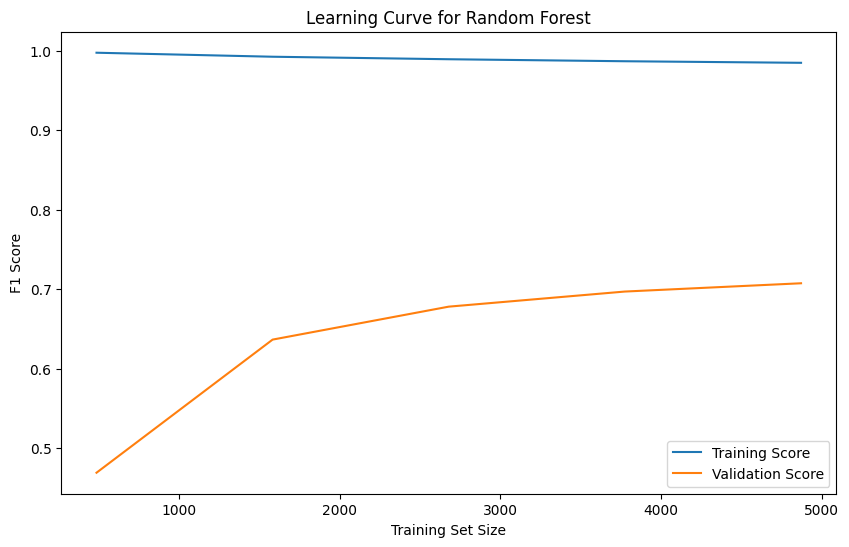

In [ ]:
# 2. Evaluate Learning Curves
# Generate training and validation scores to visualize overfitting/underfitting.

from sklearn.model_selection import learning_curve

# Learning curve for Random Forest
train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train_tfidf, y_train, cv=5, scoring='f1', n_jobs=-1
)

# Plot learning curve
import numpy as np
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()

In [ ]:
# 3. Regularization in Tree-Based Models
# Tune hyperparameters like max_depth and min_samples_split to prevent overfitting.

# Random Forest with regularization
rf_regularized = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=20, random_state=42
)
rf_regularized.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_regularized = rf_regularized.predict(X_test_tfidf)
print("Random Forest with Regularization Performance:")
print(classification_report(y_test, y_pred_regularized))


Random Forest with Regularization Performance:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       874
           1       0.97      0.23      0.37       649

    accuracy                           0.67      1523
   macro avg       0.80      0.61      0.57      1523
weighted avg       0.78      0.67      0.60      1523



**Ensemble Voting**

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
!pip install --upgrade xgboost lightgbm


In [ ]:
from sklearn.base import ClassifierMixin
from sklearn.utils._tags import _safe_tags
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.base import ClassifierMixin
from sklearn.utils._tags import _safe_tags
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

class MyXGBClassifier(XGBClassifier, ClassifierMixin):
      def __sklearn_tags__(self):
            # Inherit tags from the base class (XGBClassifier)
            # and add any necessary tags
            tags = _safe_tags(XGBClassifier, key="__sklearn_tags__")
            tags.update(ClassifierMixin.__sklearn_tags__)
            return tags

class MyLGBMClassifier(LGBMClassifier, ClassifierMixin):
        def __sklearn_tags__(self):
            tags = _safe_tags(LGBMClassifier, key="__sklearn_tags__")
            tags.update(ClassifierMixin.__sklearn_tags__)
            return tags

# Use these custom classifiers in the VotingClassifier:
fvoting_clf = VotingClassifier(
        estimators=[
            ('rf', rf),
            ('xgb', MyXGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)),
            ('lgbm', MyLGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42))
        ],
        voting='soft'
    )

In [ ]:
#  Combine predictions from multiple models for robustness.
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
# voting_clf was not defined, using fvoting_clf instead
fvoting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),  # Use the XGBoost model object
        ('lgbm', lgbm)  # Use the LightGBM model object
    ],
    voting='soft'
)
fvoting_clf.fit(X_train_tfidf, y_train)

# Evaluate ensemble
# Changed voting_clf to fvoting_clf
y_pred_voting = fvoting_clf.predict(X_test_tfidf)
print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))

[LightGBM] [Info] Number of positive: 2622, number of negative: 3468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14027
[LightGBM] [Info] Number of data points in the train set: 6090, number of used features: 683
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430542 -> initscore=-0.279641
[LightGBM] [Info] Start training from score -0.279641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

**Deployment with Interactive Interface:**

Step 1: Serialize the Trained Model
Use pickle to save the trained model for later use.


In [ ]:
import pickle

# Serialize the trained model (e.g., the best-performing model)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

print("Model serialized and saved as 'best_model.pkl'")


**Step 2: Use MLflow for Model Management**



MLflow helps track, log, and manage machine learning models.

In [ ]:
pip install mlflow

**Log the Model with MLflow**

In [ ]:
import mlflow
import mlflow.sklearn

# Start MLflow run
with mlflow.start_run():
    # Log model
    mlflow.sklearn.log_model(xgb, "xgboost_model")

    # Log parameters and metrics
    mlflow.log_param("max_depth", 6)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("n_estimators", 200)
    mlflow.log_metric("f1_score", 0.76)

print("Model logged with MLflow")

**Launch MLflow UI**

**Create an Interactive Interface with Streamlit**

In [ ]:
pip install streamlit

**Develop the Streamlit App**

In [ ]:
import streamlit as st
import pickle

# Load the trained model
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to predict disaster tweet
def predict_tweet(text):
    # Preprocess input (e.g., clean text if needed)
    cleaned_text = text.lower()

    # Transform input using TF-IDF or other vectorizer used during training
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])

    # Predict using the model
    prediction = model.predict(vectorized_text)[0]
    return "Disaster" if prediction == 1 else "Non-Disaster"

# Streamlit interface
st.title("Disaster Tweet Classifier")
st.write("Enter a tweet to classify it as disaster-related or non-disaster-related.")

# Input box for tweet
tweet_input = st.text_area("Tweet Input", "Type your tweet here...")

# Predict and display result
if st.button("Classify"):
    result = predict_tweet(tweet_input)
    st.write(f"Prediction: {result}")

**Run the Streamlit App**

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


**Streamlit Code for User Interface**

In [ ]:
import streamlit as st
import pickle
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the trained model and vectorizer
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Function to predict disaster or non-disaster
def predict_tweet(text):
    # Preprocess and vectorize input
    vectorized_text = tfidf_vectorizer.transform([text.lower()])
    prediction = model.predict(vectorized_text)[0]
    return "Disaster" if prediction == 1 else "Non-Disaster"

# Function for batch prediction
def predict_batch(data):
    vectorized_texts = tfidf_vectorizer.transform(data['text'].str.lower())
    predictions = model.predict(vectorized_texts)
    data['Prediction'] = ["Disaster" if pred == 1 else "Non-Disaster" for pred in predictions]
    return data

# Streamlit UI
st.title("Disaster Tweet Classifier")
st.write("A tool to classify tweets as disaster-related or non-disaster-related.")

# Input section
st.header("Single Tweet Classification")
tweet_input = st.text_area("Enter a tweet:", "Type your tweet here...")

if st.button("Classify"):
    result = predict_tweet(tweet_input)
    st.success(f"Prediction: {result}")

# Visualization section
st.header("Visualize Word Cloud (Optional)")
sample_text = "fire flood storm disaster help rescue"
if st.button("Generate Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    st.pyplot(plt)

# Batch processing section
st.header("Batch File Classification")
uploaded_file = st.file_uploader("Upload a CSV file with a 'text' column:", type=['csv'])

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    if 'text' in batch_data.columns:
        st.write("Uploaded file preview:")
        st.dataframe(batch_data.head())

        # Perform batch prediction
        batch_results = predict_batch(batch_data)
        st.write("Prediction Results:")
        st.dataframe(batch_results.head())

        # Download results
        st.download_button(
            label="Download Predictions",
            data=batch_results.to_csv(index=False),
            file_name="batch_predictions.csv",
            mime="text/csv"
        )
    else:
        st.error("The uploaded file must contain a 'text' column.")
